<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-&amp;-Configuration" data-toc-modified-id="Setup-&amp;-Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup &amp; Configuration</a></span></li><li><span><a href="#An-OpenML-Dataset:-cpu_small" data-toc-modified-id="An-OpenML-Dataset:-cpu_small-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>An OpenML Dataset: cpu_small</a></span><ul class="toc-item"><li><span><a href="#Load-the-raw-data" data-toc-modified-id="Load-the-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load the raw data</a></span></li><li><span><a href="#Standard-scaler" data-toc-modified-id="Standard-scaler-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Standard scaler</a></span></li><li><span><a href="#Principal-component-analysis" data-toc-modified-id="Principal-component-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Principal component analysis</a></span></li><li><span><a href="#Visualize-the-prepared-dataset" data-toc-modified-id="Visualize-the-prepared-dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize the prepared dataset</a></span></li></ul></li><li><span><a href="#Split-the-dataset-for-OOD-detection" data-toc-modified-id="Split-the-dataset-for-OOD-detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split the dataset for OOD detection</a></span></li><li><span><a href="#Subdivide-the-training-dataset-into-compact-subdomains" data-toc-modified-id="Subdivide-the-training-dataset-into-compact-subdomains-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Subdivide the training dataset into compact subdomains</a></span><ul class="toc-item"><li><span><a href="#Cluster-the-training-data" data-toc-modified-id="Cluster-the-training-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cluster the training data</a></span></li><li><span><a href="#Use-the-refine_cluster_set-module-to-visualize-the-size-distribution-of-clusters" data-toc-modified-id="Use-the-refine_cluster_set-module-to-visualize-the-size-distribution-of-clusters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Use the refine_cluster_set module to visualize the size distribution of clusters</a></span></li><li><span><a href="#Examine-sparse-clusters-in-the-core-dataset" data-toc-modified-id="Examine-sparse-clusters-in-the-core-dataset-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Examine sparse clusters in the core dataset</a></span></li><li><span><a href="#Apply-splits-and/or-remove-outliers" data-toc-modified-id="Apply-splits-and/or-remove-outliers-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Apply splits and/or remove outliers</a></span></li><li><span><a href="#Add-outliers-to-the-'extrapolation'-dataset" data-toc-modified-id="Add-outliers-to-the-'extrapolation'-dataset-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Add outliers to the 'extrapolation' dataset</a></span></li></ul></li><li><span><a href="#Build-the-p-sphere-Hull" data-toc-modified-id="Build-the-p-sphere-Hull-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build the p-sphere Hull</a></span><ul class="toc-item"><li><span><a href="#Initialize-the-p-sphere-hull" data-toc-modified-id="Initialize-the-p-sphere-hull-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Initialize the p-sphere hull</a></span></li><li><span><a href="#Test-some-points-from-the-'extrapolation'-dataset" data-toc-modified-id="Test-some-points-from-the-'extrapolation'-dataset-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test some points from the 'extrapolation' dataset</a></span></li><li><span><a href="#Estimate-the-volume-contained-by-the-hull" data-toc-modified-id="Estimate-the-volume-contained-by-the-hull-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Estimate the volume contained by the hull</a></span></li><li><span><a href="#Visualize-the-p-sphere-hull" data-toc-modified-id="Visualize-the-p-sphere-hull-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Visualize the p-sphere hull</a></span></li></ul></li><li><span><a href="#Using-the-p-sphere-hull-with-an-AI-application" data-toc-modified-id="Using-the-p-sphere-hull-with-an-AI-application-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using the p-sphere hull with an AI application</a></span><ul class="toc-item"><li><span><a href="#Train-a-regression--model" data-toc-modified-id="Train-a-regression--model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train a regression  model</a></span></li><li><span><a href="#Split-the-new-data-into-interpolation-and-extrapolation-sets" data-toc-modified-id="Split-the-new-data-into-interpolation-and-extrapolation-sets-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Split the new data into interpolation and extrapolation sets</a></span></li><li><span><a href="#Calculate-error-distributions-and-statistics" data-toc-modified-id="Calculate-error-distributions-and-statistics-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Calculate error distributions and statistics</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Quick Start Demonstrator

The `PSphereHull` library provides a new approach to detecting out-of-domain (OOD) data for 
machine learning. Rather than relying on probabilistic estimates of data density or uncertainty 
(e.g. kriging & Bayesian methods), it creates a geometrical boundary around the training data 
point cloud that can be used to accept or reject new data in an explainable way. This boundary,
called a p-sphere hull, is a collection of hypersphere or hypercylinder envelopes based on a 
prior clustering model of the point cloud. Furthermore, unlike one-class SVM or a convex hull, the p-sphere hull encloses a smaller volume and can exclude gaps inside the point cloud.

The p-sphere hull can be used with any machine learning or AI approach to prediction--it is just a geometrical model of the training dataset in feature space and can be deployed in production as a component for OOD detection

This notebook provides a minimal example to load the library and use it along with 
a machine learning model to detect out-of-domain data before making a prediction. It is designed 
to highlight the most important functionalities provided by the library.

In contrast, the notebook "P-Sphere Hull Demonstrator" provides a more academic and complete introduction to the library, including more graphics and explanations.

In [1]:
# import libraries

%matplotlib inline
#from IPython import display
from IPython.display import display
import importlib
import numpy as np
import pandas as pd
import math as m
# CPU time
from time import time
# Plotting
import pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
# Interaction
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import PSphereHull package from local folder
import os
import sys
#module_path = 'C:\\Users\\bemathiesen\\Altran\\git\\proj_PSphereHull\\src\\'
module_path = 'C:\\Users\\bemathiesen\\Altran\\git\\pspherehull Tessella\\pspherehull\\src\\'
if module_path not in sys.path:
    sys.path.append(module_path)
# PSphereHull modules
from PSphereHull import refine_cluster_set as rcs
from PSphereHull import psphere_hull as psh
from PSphereHull import basic_functions as bf

print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


## Setup & Configuration

In [3]:
# Number of clusters to find in the point cloud, and random seed for repeatability
n_clusters = 100
random_seed = 42

# Half-width of hypercube that defines the "core" dataset that simulates the training data.
# Data outside this hypercube simulate new data that may or may not be inside the p-sphere hull.
core_half_width = 2.0

# Option: apply PCA?
apply_pca = False

## An OpenML Dataset: cpu_small

This dataset has about 8000 points and represents the number of concurrent users on a single physical server.

Dataset source: https://www.openml.org/d/227

After loading the raw data, we apply the preprocessing transformations `StandardScaler()` and `PCA()`. These are helpful, not not essential. In practice, it is easier for the P-Sphere Hull library to define compact hypercylinders for elongated substructures in the point cloud when these are aligned with the coordinate axes.

__NOTE:__ For this dataset there is an extra preparation step. The case where the number of users < 10 is well separated from the main point cloud based on the feature 'freeswap' which is normally >~ 100k, but for these cases <~20. If we
include this trivial case in the dataset, it will be marked as OOD and interfere with exploring the topology of the main point cloud. Therefore, we exclude it.

###  Load the raw data

In [4]:
# Read and prepare dataset

df_raw = pd.read_csv('../data/dataset_2213_cpu_small.csv', sep=',').applymap(pd.to_numeric)
print('Original file shape')
print(df_raw.shape)

# Drop lines where usr < 10
df_raw = df_raw[df_raw['usr'] >= 10]
print('After dropping usr < 10')
print(df_raw.shape)

# get target variable
target = df_raw['usr'].values
target_server = target
df_raw.drop(['usr'], axis=1, inplace=True)

print('After removing target variable')
print(df_raw.shape)
data_server = df_raw
data_server.head()

Original file shape
(8192, 13)
After dropping usr < 10
(7898, 13)
After removing target variable
(7898, 12)


,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805


### Standard scaler

Convert all features to mean zero and standard deviation units.

In [5]:
ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data_server), columns=data_server.columns)
data_scaled.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap
0,-0.246921,-0.363095,-0.774440,-0.528486,-0.218210,-0.359269,-0.344326,-0.081362,2.056874,-0.226540,1.875829,1.388983
1,-0.339446,-0.429891,-0.089028,-0.017583,-0.298489,-0.600407,-0.306341,-0.637578,-0.363429,0.522868,-0.676688,-0.719336
2,0.789358,2.141759,0.907218,0.247886,0.102906,-0.198510,-0.268355,1.299015,1.379595,2.171567,-0.626412,-0.184420
3,-0.265426,-0.429891,1.462711,0.237868,0.170834,-0.363288,-0.044242,1.439806,0.651997,-0.975948,-0.635589,-1.185918
4,0.419258,1.407002,0.994033,0.202807,0.584579,0.283768,0.339410,0.027376,3.401475,0.822632,-0.596486,-1.065267


### Principal component analysis

Rotate data to PCA coordinate system. 

In [6]:
if apply_pca:
    pca = PCA()
    data_pca = pca.fit_transform(data_scaled)
    print(data_pca.shape)
    print(np.cumsum(pca.explained_variance_ratio_))
    data = pd.DataFrame(data_pca, columns=['PC'+str(i) for i in range(data_pca.shape[1])])
else:
    print('Option apply_pca is False')
    data = data_scaled

Option apply_pca is False


### Visualize the prepared dataset

In [7]:
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap
0,-0.246921,-0.363095,-0.774440,-0.528486,-0.218210,-0.359269,-0.344326,-0.081362,2.056874,-0.226540,1.875829,1.388983
1,-0.339446,-0.429891,-0.089028,-0.017583,-0.298489,-0.600407,-0.306341,-0.637578,-0.363429,0.522868,-0.676688,-0.719336
2,0.789358,2.141759,0.907218,0.247886,0.102906,-0.198510,-0.268355,1.299015,1.379595,2.171567,-0.626412,-0.184420
3,-0.265426,-0.429891,1.462711,0.237868,0.170834,-0.363288,-0.044242,1.439806,0.651997,-0.975948,-0.635589,-1.185918
4,0.419258,1.407002,0.994033,0.202807,0.584579,0.283768,0.339410,0.027376,3.401475,0.822632,-0.596486,-1.065267


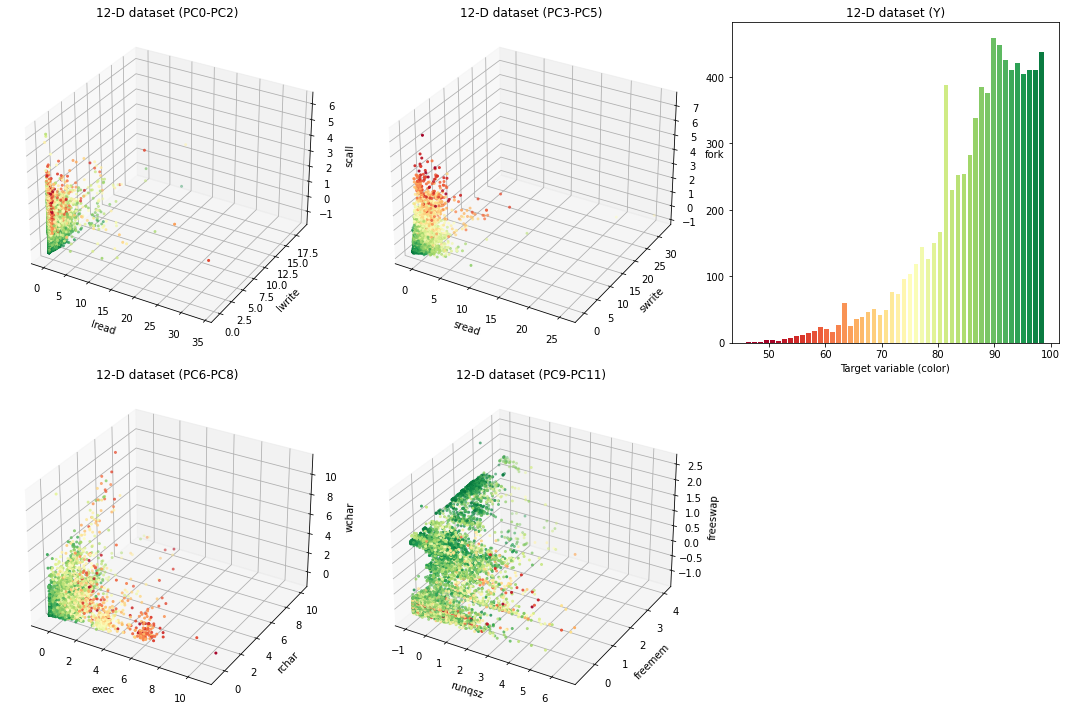

In [8]:
# plot the dataset as four 3D projections and the target variable
colormap = cm.RdYlGn #or any other colormap
normalize = colors.Normalize(vmin=50, vmax=100)
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
# Plot 3 3D projections of the data
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(231, projection='3d')
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
ax.set_title('12-D dataset (PC0-PC2)')
ax.scatter(data.values[:,0],data.values[:,1],data.values[:,2], s=4, 
           c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(232, projection='3d')
ax.set_xlabel(data.columns[3])
ax.set_ylabel(data.columns[4])
ax.set_zlabel(data.columns[5])
ax.set_title('12-D dataset (PC3-PC5)')
ax.scatter(data.values[:,3],data.values[:,4],data.values[:,5], s=4,
          c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(234, projection='3d')
ax.set_xlabel(data.columns[6])
ax.set_ylabel(data.columns[7])
ax.set_zlabel(data.columns[8])
ax.set_title('12-D dataset (PC6-PC8)')
ax.scatter(data.values[:,6],data.values[:,7],data.values[:,8], s=4, 
           c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(235, projection='3d')
ax.set_xlabel(data.columns[9])
ax.set_ylabel(data.columns[10])
ax.set_zlabel(data.columns[11])
ax.set_title('12-D dataset (PC9-PC11)')
ax.scatter(data.values[:,9],data.values[:,10],data.values[:,11], s=4,
          c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(233)
vals, bins = np.histogram(target, bins=50)
bar_colors = s_map.to_rgba(bins)
ax.bar(bins[:-1], vals, align='edge', color=bar_colors[:-1])
ax.set_xlabel('Target variable (color)')
ax.set_title('12-D dataset (Y)')
#ax.set_xlim((0,20))

fig.tight_layout()

## Split the dataset for OOD detection

Since the P-Sphere Hull is mainly useful for detecting OOD data, we want to split the data into two subsets:
* A 'core' subset containing points close to the center of the point cloud
* An 'extrapolation' subset containing points far from the center and known to be outside the core dataset.
The 'core' subset is interior to a hypercube around the center of the point cloud.

In [9]:
# The parameter core_half_width is defined in the first section

upper_limits = np.ones(12, dtype='float') * core_half_width
lower_limits = np.ones(12, dtype='float') * -core_half_width

In [10]:
# Split data and target arrays into "core" and "extrap" subsets

def point_in_hypercube(vector, hc_min, hc_max):
    """
    Test whether vector is inside the hypercube bounds defined by hc_min and hc_max.
    Returns True if inside.
    """
    outside = np.ones(vector.shape[0])
    for i, val in enumerate(vector):
        if hc_min[i] <= val <= hc_max[i]:
            # flip bit for inside
            outside[i] = 0
    return not np.any(outside) 

idx_in_core = [point_in_hypercube(data.values[i,:], lower_limits, upper_limits) for i in range(data.shape[0])]

core_data_idx = np.where(idx_in_core)[0]
extrap_data_idx = np.where(np.logical_not(idx_in_core))[0]
core_data = data.values[core_data_idx,:]
core_target = target_server[core_data_idx]
extrap_data = data.values[extrap_data_idx,:]
extrap_target = target_server[extrap_data_idx]
print('Core dataset and target shape')
print(core_data.shape, core_target.shape)
print('Extrapolation dataset and target shape')
print(extrap_data.shape, extrap_target.shape)

Core dataset and target shape
(5249, 12) (5249,)
Extrapolation dataset and target shape
(2649, 12) (2649,)


## Subdivide the training dataset into compact subdomains

We imagine the 'core' dataset to be the training data. The 'extrapolation' dataset will be used to simulate OOD detection for the model in production.

In this section, we use any clustering method and the `refine_cluster_set` module of the P-Sphere Hull library to separate the training data into a large number of compact subdomains. These subdomains will be used to define the hull in the next section.

### Cluster the training data

K-Means and Gaussian Mixture clustering both work well for most datasets. The goal is to use a large number of cluster so that each cluster's subset of data occupies a small volume.

In [11]:
# Cluster the core dataset
km = KMeans(n_clusters, random_state=random_seed)
km.fit(core_data)

KMeans(n_clusters=100, random_state=42)

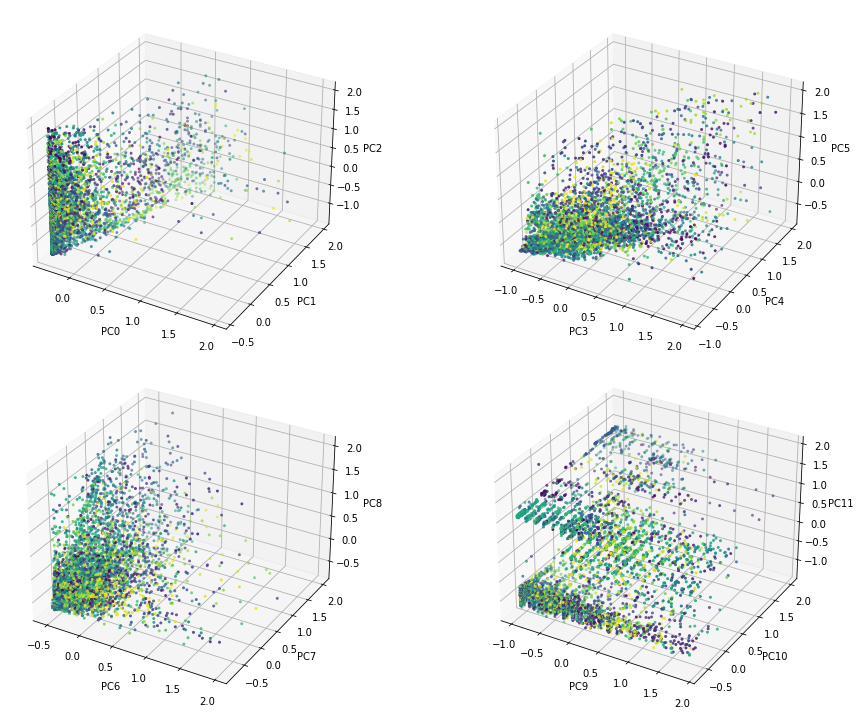

In [12]:
# 3D plots where color indicates cluster membership 

fig = plt.figure(figsize=(15,10))
for iax in range(4):
    ax = fig.add_subplot(221+iax, projection='3d')
    ax.set_xlabel('PC'+str(iax*3))
    ax.set_ylabel('PC'+str(iax*3+1))
    ax.set_zlabel('PC'+str(iax*3+2))
    ax.scatter(core_data[:,iax*3], core_data[:,iax*3+1], core_data[:,iax*3+2], s=4, c=km.labels_)
fig.tight_layout()

### Use the refine_cluster_set module to visualize the size distribution of clusters

This is the first cell block where we use the P-Sphere Hull library.

Often, the intial clustering solution will create some high-volume, sparse clusters. These can be excluded from the dataset, or you can use some functions of the `refine_cluster_set` module (alias `rcs`) to reduce the volume of such clusters:

1. `rcs.describe_cluster_pspheres()` calculates the shape of the p-cylinder that surrounds each cluster, as well as the density of points in the p-cylinder. In particular, the column ps_vratio is the volume of the p-cylinder divided by the volume of the hypercube that contains the entire datasat. If this number is close to one, then the p-cylinder is too large to describe the local geometry of the point cloud.
2. `rcs.plot_cluster_pspheres()` generates a plot from two columns of the dataframe created by the previous function. Typically, the large and sparse clusters that have excessive volume are obvious in the lower right corner of the plot. The sizes of the markers are proportional to the number of data points in the cluster, and the colors indicate the local dimensionality of the cluster. For example, a cluster of data that occupies a local 2D manifold is colored orange.

In [13]:
# Generate a dataframe with useful information on the p-cylinder surrounding each cluster

km_spheres_df = rcs.describe_cluster_pspheres(core_data, km.labels_, km.cluster_centers_)
km_spheres_df.head()

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


,ndata,localdim,radius,ps_volume,ps_vratio,ps_density,hc_volume,hc_vratio,hc_density,ps_to_hc
cluster,,,,,,,,,,
0,41,7,1.443216,16.761714,7.281713e-05,2.446051,2.632946,1.143818e-05,15.571911,6.366144
1,69,7,1.535832,4.565611,1.983417e-05,15.112983,0.360969,1.568139e-06,191.152356,12.648221
2,60,6,1.520657,1.128422,4.902151e-06,53.171604,0.204579,8.887427e-07,293.285351,5.515827
3,39,7,1.476343,12.369016,5.373414e-05,3.153040,1.461522,6.349223e-06,26.684508,8.463105
4,75,6,0.915982,0.003002,1.304074e-08,24984.708909,0.001092,4.743716e-09,68684.337693,2.749055


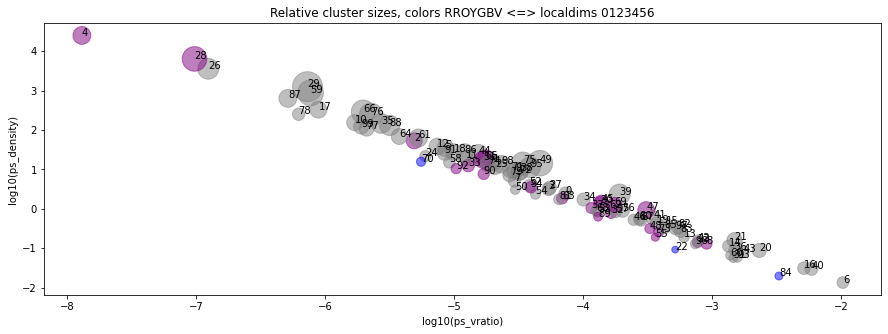

In [14]:
# Plot the density and volume of each p-cylinder

rcs.plot_cluster_pspheres(km_spheres_df, 12, 'ps_vratio', 'ps_density')

### Examine sparse clusters in the core dataset

This notebook provides a widget that lets you visualize the points of a single cluster within the whole dataset. This can be useful to identify cases where splitting a cluster or removing an outlier could reduce the volume of a hypercylinder and help the p-sphere hull follow the boundaries of the point cloud more closely.

__If you are using PCA:__

In the previous plot, we see that cluster # 54 may occupy too large a volume. We can look at it more closely using these tools.

__If you are not using PCA:__

In the previous plot the cluster with the largest volume is # 6, but the p-cylinder volume is still only 1% of the hypercube volume.

In [15]:
# define display_cluster() function for widget
# change 'method' inside function and redefine to see different clustering methods
cols_to_keep = data.columns.tolist()
def display_cluster_2(cluster_id):
    ic_colors = np.where(km.labels_ == cluster_id, 'red', 'grey')
    ic_sizes = np.where(km.labels_ == cluster_id, 9, 1)
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(131, projection='3d')
    ax.set_xlabel(cols_to_keep[0])
    ax.set_ylabel(cols_to_keep[1])
    ax.set_zlabel(cols_to_keep[2])
    ax.set_title('Cluster '+str(cluster_id))
    ax.scatter(core_data[:,0],core_data[:,1],core_data[:,2], s=ic_sizes,
              c=ic_colors)
    ax = fig.add_subplot(132, projection='3d')
    ax.set_xlabel(cols_to_keep[3])
    ax.set_ylabel(cols_to_keep[4])
    ax.set_zlabel(cols_to_keep[5])
    ax.scatter(core_data[:,3],core_data[:,4],core_data[:,5], s=ic_sizes,
              c=ic_colors)
    ax = fig.add_subplot(133, projection='3d')
    ax.set_xlabel(cols_to_keep[6])
    ax.set_ylabel(cols_to_keep[7])
    ax.set_zlabel(cols_to_keep[8])
    ax.scatter(core_data[:,6],core_data[:,7],core_data[:,8], s=ic_sizes,
              c=ic_colors)
    fig.tight_layout()
    plt.show()
    return

In [16]:
inbox = widgets.BoundedIntText(value=0, min=0, max=n_clusters-1, description='Cluster ID:')
ui = widgets.HBox([inbox])
# cluster_id is the name of an argument to f()
out = widgets.interactive_output(display_cluster_2, {'cluster_id': inbox})
display(ui,out);

Output()

In [17]:
# Look at attributes of the cluster and p-cylinder in the dataframe. We see here it contains only 31 points,
# but its p-cylinder has a volume equal to 20% of the hypercube.

if apply_pca:
    cluster_to_split = 54
else:
    cluster_to_split = 6

km_spheres_df.loc[cluster_to_split]

ndata           32.000000
localdim         8.000000
radius           2.184768
ps_volume     2361.050204
ps_vratio        0.010257
ps_density       0.013553
hc_volume       76.185629
hc_vratio        0.000331
hc_density       0.420027
ps_to_hc        30.990756
Name: 6, dtype: float64

### Apply splits and/or remove outliers

For the sake of demonstration, we use two other functions from the `rcs` module to modify cluster 54 (with PCA) or cluster 6 (without PCA).

In [18]:
# Make a copy of the original labels and centers
new_labels, new_centers = km.labels_, km.cluster_centers_

# Split cluster 54 into two subclusters
new_labels, new_centers, success = rcs.split_cluster(core_data, 
            new_labels, new_centers, cluster_to_split, min_size=3, verbose=True)

# Remove an outlier from each subcluster
new_labels = rcs.flag_outlier(core_data, new_labels, new_centers, cluster_to_split)
new_labels = rcs.flag_outlier(core_data, new_labels, new_centers, 100)
print(new_centers.shape)

......cluster 6 split successfully
(101, 12)


In [19]:
# The dataset is unchanged, but the cluster labels have changed.
# Note that the p-cylinders surrounding the two new subclusters, with ids 54 and 100, are much smaller.
# The values of ps_vratio are much less than 1.

spheres_df = rcs.describe_cluster_pspheres(core_data, new_labels, new_centers)
spheres_df.loc[[cluster_to_split,100]]

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


,ndata,localdim,radius,ps_volume,ps_vratio,ps_density,hc_volume,hc_vratio,hc_density,ps_to_hc
cluster,,,,,,,,,,
6,28,7,1.862931,6.354998e+01,2.760772e-04,4.405981e-01,6.661118e+00,2.893758e-05,4.203499e+00,9.540438
100,2,1,0.717783,8.983091e-11,3.902483e-16,2.226405e+10,3.435776e-10,1.492588e-15,5.821101e+09,0.261457


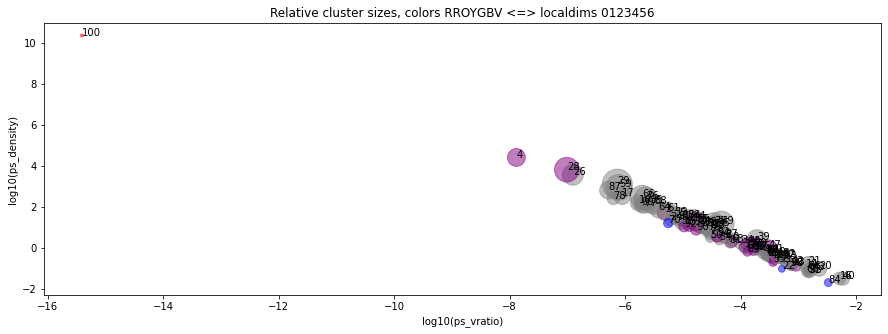

In [20]:
rcs.plot_cluster_pspheres(spheres_df, 12, 'ps_vratio', 'ps_density')

### Add outliers to the 'extrapolation' dataset

In [21]:
# Add outliers to extrap_data matrix
new_core_idx = np.where(new_labels != -1)[0]
outlier_idx = np.where(new_labels == -1)[0]
print('Number of outliers removed earlier:', len(outlier_idx))
new_core_data = core_data[new_core_idx,:]
new_core_target = core_target[new_core_idx]
outlier_data = core_data[outlier_idx,:]
outlier_target = core_target[outlier_idx]
new_extrap_data = np.concatenate((extrap_data,outlier_data))
new_extrap_target = np.concatenate((extrap_target,outlier_target))
print('New core dataset shapes:')
print(new_core_data.shape, new_core_target.shape)
print('New extrapolation dataset shapes:')
print(new_extrap_data.shape, new_extrap_target.shape)

Number of outliers removed earlier: 2
New core dataset shapes:
(5247, 12) (5247,)
New extrapolation dataset shapes:
(2651, 12) (2651,)


## Build the p-sphere Hull

In this section we generate a `PSphereHull` object from the final clustering solution on the training data. The hull is a collection of `PSphere` objects, one for each cluster. Each `PSphere` object contains a copy of the data in the cluster, but translated so that the cluster center is the origin of the vector. The `PSphere` objects also contain information on the hypersphere and hypercylinder envelopes that surround the cluster data.

A new data point is inside the hull if it is inside any p-sphere. The `PSphereHull.contains()` method classifies a point as OOD if is is outside all p-spheres OR outside the hypercube of the training data point cloud.

If you want to examine the situation of a new data point in more detail, you can use the `PSphereHull.psphere_distances()` method to calculate the distance of the point from each p-sphere in the collection; this is a $n \times k$ array where $n$ is the number of points and $k$ is the number of clusters/p-spheres. A distance of 0 indicates that the point is inside the p-sphere.

__Note:__ if 'compute_all' is set to True then the object runs a set of calculations that can be time-consuming and may not be needed for OOD detection.

### Initialize the p-sphere hull

This series of commands creates the p-sphere hull and initializes the hypercylinder geometries in addition to the hypersphere geometries. It is strongly recommended to use hypercylinders.

In [22]:
%%time

# Create a PSphereHull object: a
hull = psh.PSphereHull(core_data, new_labels, new_centers, compute_all=False)
hull.make_local_dimensions()
hull.make_pcylinders()

Wall time: 7.96 s


### Test some points from the 'extrapolation' dataset

As expected, all 'extrapolation' points are outside the p-sphere hull when using the 
`hull.contains()` method with the argument `hypercube_filter=True`, because in this case
the method assumes that the hypercube around the training data should also be used as 
a hard boundary for OOD detection.

On the other hand, when we use the default `hull.contains()` or `hull.psphere_distances()` method, only points that are outside all the hypercylinders are considered OOD.

In [23]:
hull.contains(extrap_data[:10,:], hypercube_filter=True)

array([False, False, False, False, False, False, False, False, False,
       False])

In [24]:
hull.contains(extrap_data[:10,:])

array([False, False, False, False, False, False, False,  True, False,
       False])

In [25]:
%%time

distances_array = hull.psphere_distances(extrap_data)
print(distances_array.shape)
minimum_distances = np.min(distances_array, axis=1)

(2649, 101)
Wall time: 39.3 s


In [26]:
np.where(minimum_distances==0.0)[0].shape

(680,)

Calculating all those distances took a little time. If you need to speed up data testing, you can run the method `hull.flag_redundant_spheres` to identify and mask the p-spheres with no unique data points. This algorithm loops over the entire set of p-spheres several times to remove high-volume clusters first, in order to preserve the local geometry of the point cloud as much as possible.

__Warning!__ This method may take a few minutes to run, so it is commented out.

In [27]:
%%time

# Note that the arguments values shown here are also their default values
# mask = hull.flag_redundant_spheres(max_unique=0, use_pcylinders=True, reset_masks=True, apply_masks=True)

# print('P-Spheres flagged as redundant:')
# print(mask)

Wall time: 0 ns


### Estimate the volume contained by the hull

These methods can estimate how much smaller the p-sphere hull is compared to the hypercube surrounding the training data. In this example, based on a random and uniform sampling of points within the hypercube, only a fraction of a percent land inside the p-sphere hull!

This shows that defining an OOD boundary with just the minimum and maximum values of each feature (i.e. the hypercube faces) includes an enormous volume of empty space where a machine learning algorithm has no information and is forced to extrapolate. The whole point of this library and OOD detection more generally is to reduce the risk of a large error in this gaps.

In [28]:
%%time

hull.make_volume_ratios(1000)
print('Sum of p-cylinder volumes in units of hypercube volume:')
print(hull.naive_pcylinder_vratio)
print('Sampled volume ratio of hull:') 
print(hull.sampled_pcylinder_vratio, '+/-', hull.sampled_pcylinder_vratio_sigma)

Sum of p-cylinder volumes in units of hypercube volume:
0.04505337486008229
Sampled volume ratio of hull:
0.015 +/- 0.003872983346207417
Wall time: 17.6 s


In [29]:
print('Full dataset shape:', data.shape)
print('Core dataset shape:', core_data.shape)
print('Outside core dataset shape:', extrap_data.shape)

Full dataset shape: (7898, 12)
Core dataset shape: (5249, 12)
Outside core dataset shape: (2649, 12)


### Visualize the p-sphere hull

A hypercylinder's projection in 2 dimensions is either a circle or a rectangle. For the p-sphere hull, the cylinder axes are always parallel to the feature axes.

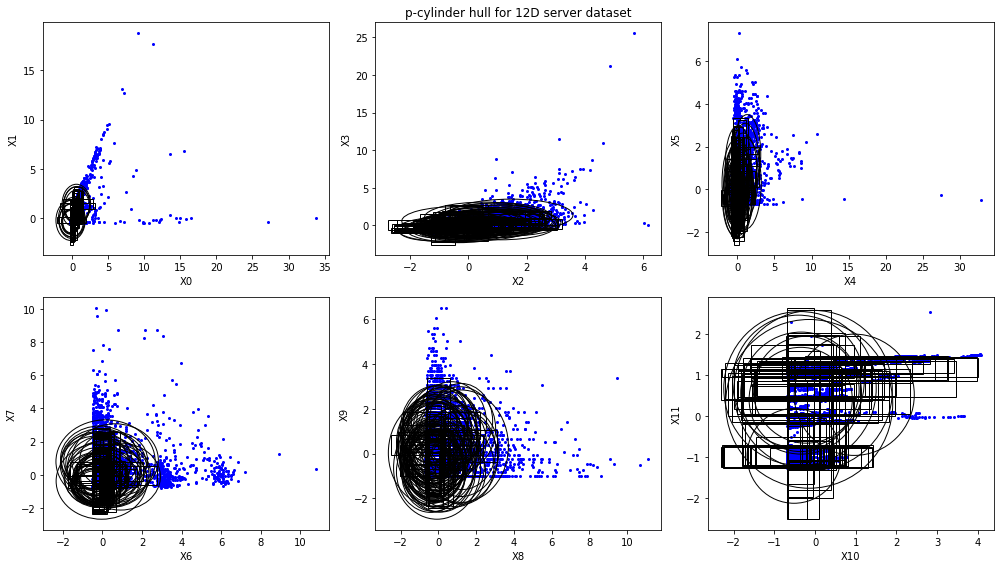

In [30]:
# Code to draw the hull in six 2D projections, using only non-redundant domains
fig = plt.figure(figsize=(14,8))
idx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
dim_map = {1:'red', 2:'orange', 3:'yellow', 4:'green', 5:'blue', 6:'purple', 7:'black', 8:'black', 9:'black'}
clus_cols = [dim_map[i] for i in hull.localdims]
lims = list(zip(hull.hc_min, hull.hc_max))
only_hypercube = False

for iax in range(6):
    idx1 = idx[iax][0]
    idx2 = idx[iax][1]
    ax = fig.add_subplot(231 + iax)
    ax.set_xlabel('X'+str(idx1))
    ax.set_ylabel('X'+str(idx2))
    ax.scatter(data.values[:,idx1], data.values[:,idx2], s=4, c='blue')
    for k in range(hull.n_spheres):
        if hull.spheres[k].used:
            cyl, rect = rcs.pcylinder_patch(idx1, idx2, hull.spheres[k].center, hull.spheres[k].radius,
                                            hull.spheres[k].compact_dims, hull.spheres[k].compact_ranges, color='black')
            ax.add_patch(cyl)
            if (only_hypercube):
                ax.set_xlim(lims[idx1])
                ax.set_ylim(lims[idx2])
    if iax == 1:
        ax.set_title('p-cylinder hull for 12D server dataset')
fig.tight_layout()        

## Using the p-sphere hull with an AI application

Now let's see how the p-sphere hull lets you add OOD detection to an application and detect points at risk of large errors.

In [31]:
X = new_core_data
y = new_core_target

print(X.shape, y.shape)
print(hull)

(5247, 12) (5247,)


In [32]:
# Sanity check that the core dataset is entirely contained in the hull

contains_result = hull.contains(X)
print(np.where(contains_result == False)[0])

[]


### Train a regression  model

We do a train-test split on the 'core' dataset so that we also have a large number of examples where we know that the model is probably interpolating the target.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4197, 12) (1050, 12) (4197,) (1050,)


In [34]:
reg = RandomForestRegressor(n_estimators=40, criterion='mae', n_jobs=3, random_state=random_seed)
reg.fit(X_train, y_train)
yp_train = reg.predict(X_train)
yp = reg.predict(X_test)

print('train MAE:', np.mean(np.abs(yp_train - y_train)))
print('test MAE:', np.mean(np.abs(yp - y_test)))

train MAE: 0.7284667619728379
test MAE: 1.853119047619048


### Split the new data into interpolation and extrapolation sets

We defined previously an 'extrap' dataset which should be mostly OOD since they lie outside the training data hypercube.

However, some of these data are inside the p-sphere hull, so we can assume that the model is being asked to interpolate for these points, and the mean error should be comparable to the test MAE.

On the other hand, for truly OOD data outside the p-sphere hull, the model is being asked to extrapolate and the errors are not only larger but uncontrolled. 

In [35]:
# The 'extrap' dataset was not used to train the model or define the hull

X_ood = new_extrap_data
y_ood = new_extrap_target

print('Extrapolation dataset shape', X_ood.shape)

Extrapolation dataset shape (2651, 12)


In [36]:
# Model predictions for the OOD dataset
yp_ood = reg.predict(X_ood)

In [37]:
%%time

# Extrapolation dataset contains only data that falls outside the hull (distance > 0)
ood_interp_idx = np.where(hull.contains(X_ood))[0]
print('Number of "OOD" data points inside p-sphere hull:', len(ood_interp_idx))
ood_extrap_idx = np.where(np.logical_not(hull.contains(X_ood)))[0]
print('Number of "OOD" data points outside p-sphere hull:', len(ood_extrap_idx))
y_interp = y_ood[ood_interp_idx]
yp_interp = yp_ood[ood_interp_idx]
y_extrap = y_ood[ood_extrap_idx]
yp_extrap = yp_ood[ood_extrap_idx]

Number of "OOD" data points inside p-sphere hull: 680
Number of "OOD" data points outside p-sphere hull: 1971
Wall time: 1min 5s


### Calculate error distributions and statistics

As the plots below show, the error distributions are very similar between the two interpolation cases, but the mean error is larger and the error distribution is wider when the model must extrapolate.

* "Test set errors" : 20% of the training data inside the 'core' hypercube reserved to evaluate the model.
* "Interpolation errors" : data that were outside the 'core' hypercube but inside the p-sphere hull.
* "Extrapolation errors" : these are the truly OOD points, outside the p-sphere hull, so we know the model is extrapolating.

Test set MAE: 1.853119047619048
Interpolation MAE: 1.6580882352941178
Extrapolation MAE: 4.695357686453576


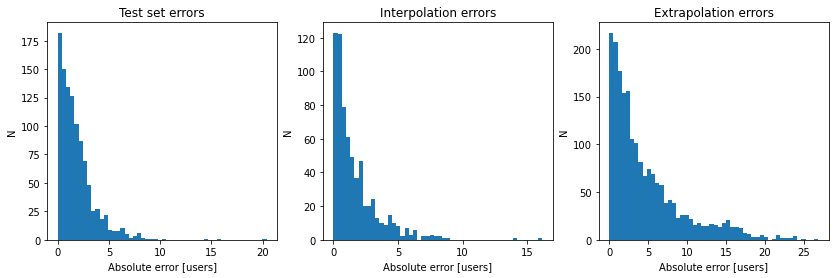

In [38]:
# Mean absolute error comparison

fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
print('Test set MAE:', np.mean(np.abs(yp - y_test)))
ax1.hist(np.abs(yp-y_test), bins=50);
ax1.set_xlabel('Absolute error [users]')
ax1.set_ylabel('N')
ax1.set_title('Test set errors')
ax2 = fig.add_subplot(132)
print('Interpolation MAE:', np.mean(np.abs(yp_interp - y_interp)))
ax2.hist(np.abs(yp_interp - y_interp), bins=50);
ax2.set_xlabel('Absolute error [users]')
ax2.set_ylabel('N')
ax2.set_title('Interpolation errors');
ax3 = fig.add_subplot(133)
print('Extrapolation MAE:', np.mean(np.abs(yp_extrap - y_extrap)))
ax3.hist(np.abs(yp_extrap - y_extrap), bins=50);
ax3.set_xlabel('Absolute error [users]')
ax3.set_ylabel('N')
ax3.set_title('Extrapolation errors');

Test Set MRE: 0.02136513172747897
Interpolation MRE: 0.019571917541509123
Extrapolation MRE: 0.06826827302385402


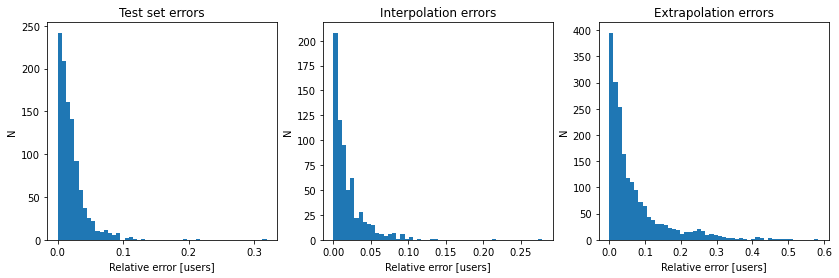

In [39]:
# Mean relative error comparison

print('Test Set MRE:', np.mean(np.abs(yp - y_test) / y_test))
print('Interpolation MRE:', np.mean(np.abs(yp_interp - y_interp) / y_interp))
print('Extrapolation MRE:', np.mean(np.abs(yp_extrap - y_extrap) / y_extrap))

fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax1.hist(np.abs(yp - y_test) / y_test, bins=50);
ax1.set_xlabel('Relative error [users]')
ax1.set_ylabel('N')
ax1.set_title('Test set errors')

ax2 = fig.add_subplot(132)
ax2.hist(np.abs(yp_interp - y_interp) / y_interp, bins=50);
ax2.set_xlabel('Relative error [users]')
ax2.set_ylabel('N')
ax2.set_title('Interpolation errors');

ax3 = fig.add_subplot(133)
ax3.hist(np.abs(yp_extrap - y_extrap) / y_extrap, bins=50);
ax3.set_xlabel('Relative error [users]')
ax3.set_ylabel('N')
ax3.set_title('Extrapolation errors');

Plot extrapolation error versus different metrics that can be considered a proxy for extrapolation difficulty.

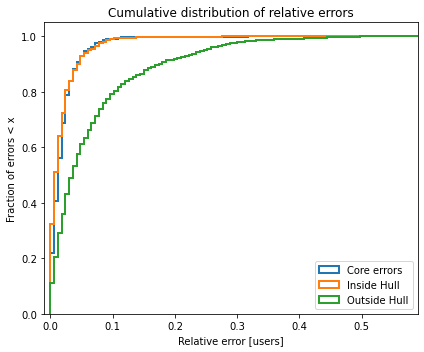

In [40]:
# Overall cumulative distributions of in-domain and OOD errors
core_relerr = np.abs(yp - y_test) / y_test
interp_relerr = np.abs(yp_interp - y_interp) / y_interp
extrap_relerr = np.abs(yp_extrap - y_extrap) / y_extrap

bins=np.linspace(0.0,0.6,101)
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.hist(core_relerr, cumulative=True, bins=bins, histtype='step', lw=2, density=True, label='Core errors');
ax1.hist(interp_relerr, cumulative=True, bins=bins, histtype='step', lw=2, density=True, label='Inside Hull');
ax1.hist(extrap_relerr, cumulative=True, bins=bins, histtype='step', lw=2, density=True, label='Outside Hull');
ax1.set_title('Cumulative distribution of relative errors')
ax1.set_xlabel('Relative error [users]')
ax1.set_ylabel('Fraction of errors < x')
ax1.set_xlim((-0.01,0.59))
ax1.legend(loc='lower right')
fig.tight_layout()

## Conclusion

This notebook has demonstrated the most basic use case for the `pspherehull` library: building trustworthy AI applications by detecting OOD data before delivering a prediction result to the end users. Predictions on OOD data are not necessarily wrong, but they have a much higher risk of being wrong and the size of the error is unconstrained. In contrast, when we ask the model for predictions inside the p-sphere hull, the distribution of interpolation errors can be reliably measured and so the performance of the model is under control.

Other ways this library can help:
* Rather than randomly defining cross-validation splits or folds, you can require that the train set's p-sphere hull encloses a large enough volume to contain the test set. With random splits you can end up with test data that are OOD.
* In experimental design, the p-sphere hull of previous experimental configurations can be used as an alternative to space filling algorithms to select new experiments. For example, you can randomly sample the space of possible configurations and select new experiments that are outside the hull, but also within a reasonably small distance from the hull.
* In safety-critical systems such as medical diagnosis or autonomous driving, you can prevent the AI from making any recommendation or decision for OOD data, so that human users trust that the model knows its own limitations.